# Problem Statement
For the purpose of this Project we will be
creating one such Recommendation Engine
from the ground up, where every single user,
based on there area of interest and ratings,
would be recommended a list of movies that
are best suited for them.

# Dataset Information
1.
ID Contains the separate keys for
customer and movies.
2.
Rating A section contains the user
ratings for all the movies.
3.
Genre Highlights the category of the
movie.
4.
Movie Name Name of the movie with
respect to the movie id.

# Objective
1.
Find out the list of most popular and liked genre
2.
Create Model that finds the best suited Movie for one
user in every genre.
3.
Find what Genre Movies have received the best and
worst ratings based on User Rating.

**LOADING DATASET**

**IMPORTING NECESSARY LIBRARY**

In [47]:
import pandas as pd                                                                          # to read dataset
import numpy as np                                                                           # to neumeric 
import seaborn as sns                                                                        # to visualize
import matplotlib.pyplot as plt                                                              # to visulize
from sklearn.linear_model import LogisticRegression                                          # for modeling                                                     
from sklearn.model_selection import train_test_split                                         # for spliting data 
from sklearn.preprocessing import StandardScaler, OrdinalEncoder                             # For scaling and encoding
from sklearn.impute import SimpleImputer                                                     # For handling missing values
from sklearn.metrics import classification_report, mean_squared_error, silhouette_score      # To Evaluate Model

In [48]:
# Reading dataset
Data = pd.read_csv(r'C:\Users\SAMIM IMTIAZ\Desktop\combined_data_1.txt')
Data.head()                   

,,1:
1488844,3.0,2005-09-06
822109,5.0,2005-05-13
885013,4.0,2005-10-19
30878,4.0,2005-12-26
823519,3.0,2004-05-03


In [49]:
# Not named_ naming the columns 
Data = pd.read_csv(r'C:\Users\SAMIM IMTIAZ\Desktop\combined_data_1.txt',header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])


# Convert Ratings column to a float
Data['Rating'] = Data['Rating'].astype(float)

Data

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [50]:
Data.isna().sum()

Cust_Id       0
Rating     4499
dtype: int64

In [51]:
Data.describe()

,Rating
count,2.405376e+07
mean,3.599634e+00
std,1.086118e+00
min,1.000000e+00
25%,3.000000e+00
50%,4.000000e+00
75%,4.000000e+00
max,5.000000e+00


In [52]:
Data.dtypes

Cust_Id     object
Rating     float64
dtype: object

In [53]:
Data2 = pd.read_csv(r'C:\Users\SAMIM IMTIAZ\Desktop\Netflix_movie_titles.csv', encoding='ISO-8859-1', header=None, usecols=[0,1,2], names=['Movie_Id','Year','Name' ])
Data2.head()

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW


In [54]:
print(type(Data['Rating']))

<class 'pandas.core.series.Series'>


In [55]:
Data['Rating'].isna().sum()

4499

In [56]:
#get the movie count ( as the NaN values in Rating column will show how many movie are there )
movie_count = Data['Rating'].isnull().sum()

In [57]:
movie_count

4499

In [58]:
#to claculate how many customers we are having in the dataset
customer_count=Data['Cust_Id'].nunique()

In [59]:
customer_count

475257

In [60]:
customer_count - movie_count  # Total number of customers that we have after removing movie id from the column

470758

In [61]:
#get the total number of ratings given by the customers
# In Customer id column we will remove movie id to get how many total rating are there
rating_count=Data['Cust_Id'].count()-movie_count 

In [62]:
rating_count

24053764

In [63]:
#To find out how many people have rated the movies as 1, 2, 3,4,5 stars ratings to the movies
stars=Data.groupby('Rating')['Rating'].agg(['count'])

In [64]:
stars

,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


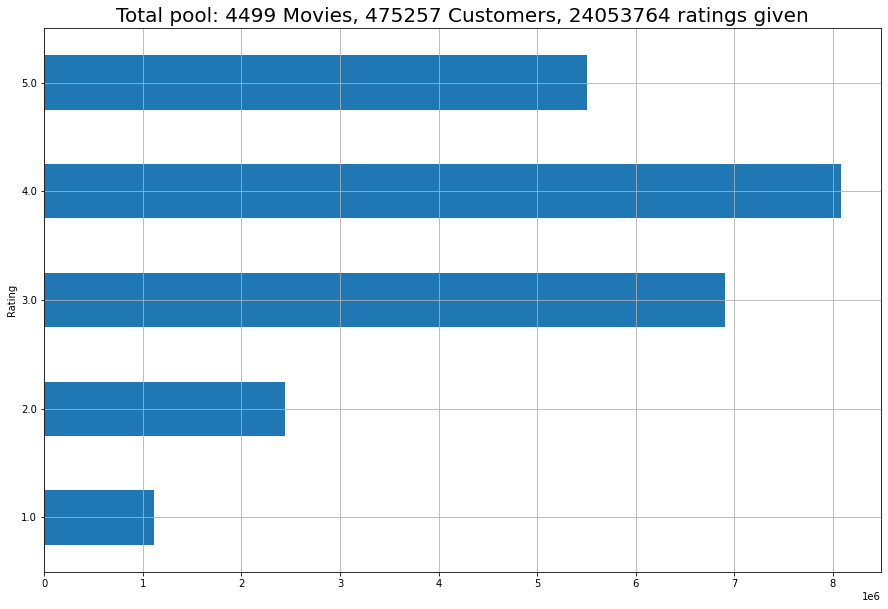

In [65]:
ax=stars.plot(kind='barh', legend=False, figsize=(15,10))
plt.title(f'Total pool: {movie_count} Movies, {customer_count} Customers, {rating_count} ratings given', fontsize=20)
plt.grid(True)

In [66]:
Data

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [67]:
# Lets just make a clear dataframe to find how many MovieId are there
movie_id=None
movie_np =[]
# Iterate over the DataFrame rows
for cust_id in Data['Cust_Id']:
    if ':' in cust_id:
      # Update the current movie ID
      movie_id = int(cust_id.replace(':', ''))
    movie_np.append(movie_id)

In [68]:
movie_np

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [69]:
# Add the new column to the DataFrame
Data['Movie_Id'] = movie_np

In [70]:
Data

,Cust_Id,Rating,Movie_Id
0,1:,NaN,1
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [71]:
# t excludes rows where the 'Rating' is NaN)to keep only the rows where the 'Rating' column is not null (i.e., i)
Data = Data[Data['Rating'].notna()]

In [72]:
Data

,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [73]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24053764 entries, 1 to 24058262
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Cust_Id   object 
 1   Rating    float64
 2   Movie_Id  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 734.1+ MB


In [74]:
Data["Cust_Id"]=Data["Cust_Id"].astype(int)

<ipython-input-74-e4d3f9693fb6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data["Cust_Id"]=Data["Cust_Id"].astype(int)


In [75]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24053764 entries, 1 to 24058262
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Cust_Id   int32  
 1   Rating    float64
 2   Movie_Id  int64  
dtypes: float64(1), int32(1), int64(1)
memory usage: 642.3 MB


In [76]:
Movie_Summary = Data.groupby('Movie_Id')['Rating'].agg(["count"])

In [77]:
Movie_Summary

,count
Movie_Id,
1,547
2,145
3,2012
4,142
5,1140
...,...
4495,614
4496,9519
4497,714


In [78]:
#now we will create a benchmark
Movie_Benchmark = round(Movie_Summary['count'].quantile(0.6))
Movie_Benchmark

908

In [79]:
drop_movie_list = Movie_Summary[Movie_Summary['count']<Movie_Benchmark].index
drop_movie_list

Int64Index([   1,    2,    4,    7,    9,   10,   11,   12,   13,   14,
            ...
            4480, 4481, 4486, 4487, 4491, 4494, 4495, 4497, 4498, 4499],
           dtype='int64', name='Movie_Id', length=2699)

In [80]:
len(drop_movie_list)

2699

In [81]:
4499-2699  #movies left

1800

In [82]:
#now we will remove all the users that are in-active
cust_summary = Data.groupby('Cust_Id')['Rating'].agg(["count"])
cust_summary

,count
Cust_Id,
6,153
7,195
8,21
10,49
25,4
...,...
2649404,12
2649409,10
2649421,3


In [83]:
cust_benchmark=round(cust_summary['count'].quantile(0.6))
cust_benchmark

36

In [84]:
drop_cust_list=cust_summary[cust_summary['count']<cust_benchmark].index
drop_cust_list

Int64Index([      8,      25,      33,      83,      94,     126,     130,
                133,     142,     149,
            ...
            2649337, 2649343, 2649351, 2649376, 2649379, 2649384, 2649401,
            2649404, 2649409, 2649421],
           dtype='int64', name='Cust_Id', length=282042)

In [85]:
len(drop_cust_list)

282042

In [86]:
Data = Data[~Data['Movie_Id'].isin(drop_movie_list)]
Data = Data[~Data['Cust_Id'].isin(drop_cust_list)]
print(Data.shape)

(19695836, 3)


In [87]:
Data

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3
...,...,...,...
24056842,1055714,5.0,4496
24056843,2643029,4.0,4496
24056844,267802,4.0,4496
24056845,1559566,3.0,4496


In [88]:
!pip install scikit-surprise

In [91]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import train_test_split
from surprise import Reader, Dataset
from surprise.model_selection import cross_validate

In [92]:
reader=Reader()

In [93]:
#we only work with top 100K rows for quick runtime
Netflix = Dataset.load_from_df(Data[['Cust_Id','Movie_Id','Rating']][:100000], reader)

In [94]:
model=SVD()  # Creating a SVD model

In [95]:
cross_validate(model, Netflix, measures=['RMSE'], cv=3)

{'test_rmse': array([1.01964149, 1.02116019, 1.01720293]),
 'fit_time': (2.2541542053222656, 2.0339505672454834, 1.9763200283050537),
 'test_time': (3.8225412368774414, 0.45497703552246094, 0.495286226272583)}

# Recommendation

In [96]:
Data

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3
...,...,...,...
24056842,1055714,5.0,4496
24056843,2643029,4.0,4496
24056844,267802,4.0,4496
24056845,1559566,3.0,4496


In [97]:
Data2

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [98]:
# Filter the dataset for the specific user
user_ratings = Data[Data['Cust_Id'] == 1055714 ]
user_ratings

,Cust_Id,Rating,Movie_Id
42163,1055714,5.0,18
92227,1055714,4.0,28
210936,1055714,2.0,30
262254,1055714,5.0,57
279656,1055714,5.0,58
...,...,...,...
23805263,1055714,5.0,4432
23945242,1055714,4.0,4472
23977663,1055714,5.0,4479
24018719,1055714,5.0,4488


In [99]:
# Find the number of unique movies rated by the user
movies_rated_by_user = user_ratings['Movie_Id'].nunique()

movies_rated_by_user

340

In [101]:
user_1055714	=Data2.copy()   #making a copy for each individual customer for the recomendation
user_1055714

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [102]:
user_1055714=user_1055714[~user_1055714['Movie_Id'].isin(drop_movie_list)]
user_1055714

,Movie_Id,Year,Name
2,3,1997.0,Character
4,5,2004.0,The Rise and Fall of ECW
5,6,1997.0,Sick
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [103]:
user_1055714['Estimate_Score']=user_1055714['Movie_Id'].apply(lambda x: model.predict(1055714, x).est)

# predict the score (rating) that a user (with user ID 1331154) might give to a list of movies.

<ipython-input-103-8184e2feb582>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_1055714['Estimate_Score']=user_1055714['Movie_Id'].apply(lambda x: model.predict(1055714, x).est)


In [104]:
user_1055714

,Movie_Id,Year,Name,Estimate_Score
2,3,1997.0,Character,3.899856
4,5,2004.0,The Rise and Fall of ECW,4.324829
5,6,1997.0,Sick,2.736738
7,8,2004.0,What the #$*! Do We Know!?,2.369425
15,16,1996.0,Screamers,3.729227
...,...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...,3.722845
17766,17767,2004.0,Fidel Castro: American Experience,3.722845
17767,17768,2000.0,Epoch,3.722845
17768,17769,2003.0,The Company,3.722845


In [105]:
user_1055714.sort_values('Estimate_Score', ascending=False)

,Movie_Id,Year,Name,Estimate_Score
4,5,2004.0,The Rise and Fall of ECW,4.324829
27,28,2002.0,Lilo and Stitch,3.973613
2,3,1997.0,Character,3.899856
17,18,1994.0,Immortal Beloved,3.854463
29,30,2003.0,Something's Gotta Give,3.764775
...,...,...,...,...
16,17,2005.0,7 Seconds,3.565199
24,25,1997.0,Inspector Morse 31: Death Is Now My Neighbour,3.552090
25,26,2004.0,Never Die Alone,3.002911
5,6,1997.0,Sick,2.736738


In [106]:
top5_movies=user_1055714.sort_values('Estimate_Score', ascending=False).head(5)
top5_movies

,Movie_Id,Year,Name,Estimate_Score
4,5,2004.0,The Rise and Fall of ECW,4.324829
27,28,2002.0,Lilo and Stitch,3.973613
2,3,1997.0,Character,3.899856
17,18,1994.0,Immortal Beloved,3.854463
29,30,2003.0,Something's Gotta Give,3.764775
